In [165]:
using Polynomials, Plots, QuadGK, Printf
using Polynomials: roots

#### Zadanie 1

In [129]:
function legendre_polynomial(n)
    p_0 = Polynomial([1])
    p_1 = Polynomial([0, 1])

    if n == 0
        return p_0
    elseif n == 1
        return p_1
    end
    
    for k in 1:n-1
        p_k = ((2k + 1) /(k + 1)) * Polynomial([0, 1]) * p_1  - (k /(k + 1)) * p_0 
        p_0, p_1 = p_1, p_k
    end
    return p_1
    
end

legendre_polynomial (generic function with 1 method)

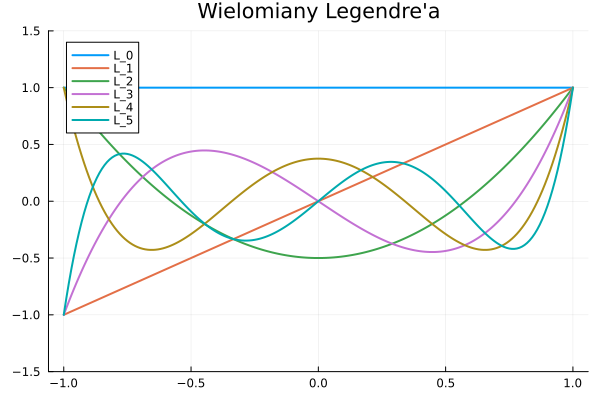

In [130]:
x = -1:0.01:1
plt = plot(ylims=[-1.5,1.5], title="Wielomiany Legendre'a", legend=:topleft)

for n in 0:5
    l_poly = legendre_polynomial(n)
    y = l_poly.(x)
    plot!(plt, x, y, label="L_$n",lw=2)
end

display(plt)

Testy dla miejsc zerowych

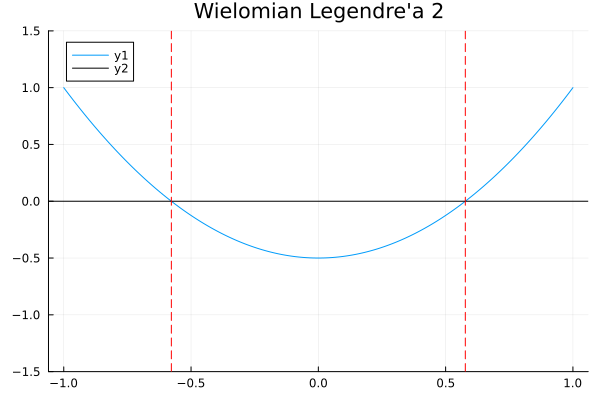

[-0.5773502691896258, 0.5773502691896258]
[-0.5773502691896258, 0.5773502691896256]


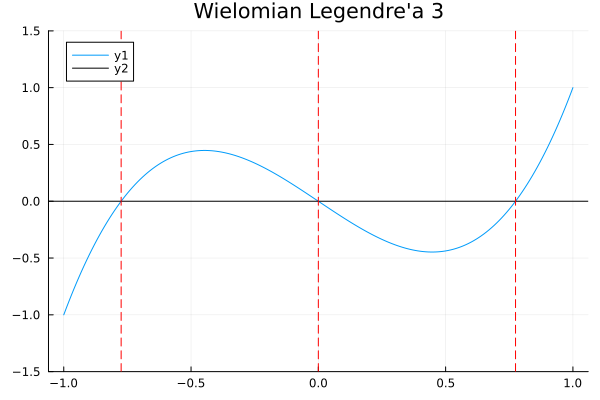

[-0.7745966692414834, 0.0, 0.7745966692414834]
[-0.7745966692414834, 0.0, 0.7745966692414835]


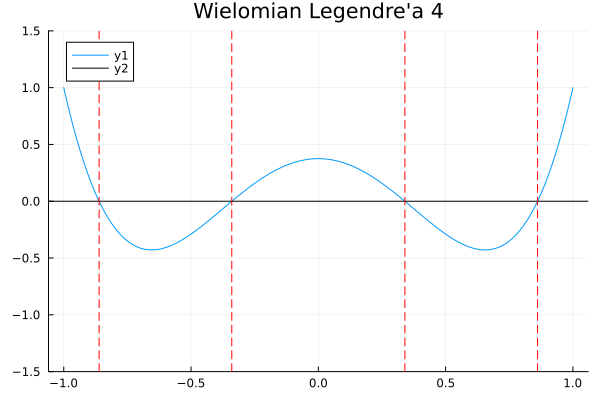

[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]


In [140]:
x = -1:0.01:1

for i in 2:4
    p = legendre_polynomial(i)
    y = p.(x)
    (xp, a) = gauss(Float64,i);

    plt = plot(x,y,ylims=[-1.5,1.5], title="Wielomian Legendre'a $i", legend=:topleft)
    hline!(plt, [0], color = :black)
    vline!(plt, xp, linestyle = :dash, color = :red, label = "")

    display(plt)
    println(xp)
    println(sort(roots(p)))
end

Twierdzenie kwadratury Gaussa mówi, że całkę funkcji można przybliżyć za pomocą sumy ważonej wartości tej funkcji
w specjalnie dobranych punktach, tzw. węzłach (odciętych) Gaussa. Dla przedziału [-1, 1]
tymi węzłami są dokładnie pierwiastki wielomianu Legendre’a $P_n(x)$


#### Zadanie 2

Obliczanie jednej funkcji

In [132]:
k = 5
f = Polynomial([1,2,3,4,5])

(xp, a) = gauss(Float64,k)
val = sum(a.* f.(xp))
println("Wartości funkcji w punktach Gaussa: ", val)

Wartości funkcji w punktach Gaussa: 6.000000000000001


Testowanie dla większych stopni

In [162]:
function gauss_integral_0_1(k, f)
    (xp, a) = gauss(Float64, k)
    # Przeskalowanie z [-1,1] do [0,1]
    xp′ = (xp .+ 1) ./ 2
    a′ = a ./ 2
    return sum(a′ .* f.(xp′))
end


gauss_integral_0_1 (generic function with 1 method)

In [ ]:
test = [[if j != i  0 else i end for i in 1:j] for j in 1:10]

@printf("%-4s │ %-12s │ %-12s │ %-10s\n", "k", "Gauss", "Correct", "Result")
println("─────┼──────────────┼──────────────┼────────────")

tol = 1e-12

for k in 1:10
    f_val(x) = x^k
    approx = gauss_integral_0_1(3, f_val)
    correct = 1 / (k + 1)
    status = abs(approx - correct) < tol ? "PASSED  ✔" : "FAILED ✘"
    @printf("%-4d │ %-12.10f │ %-12.10f │ %-10s\n", k, approx, correct, status)
end



k    │ Gauss        │ Correct      │ Result    
─────┼──────────────┼──────────────┼────────────
1    │ 0.5000000000 │ 0.5000000000 │ PASSED ✔  
2    │ 0.3333333333 │ 0.3333333333 │ PASSED ✔  
3    │ 0.2500000000 │ 0.2500000000 │ PASSED ✔  
4    │ 0.2000000000 │ 0.2000000000 │ PASSED ✔  
5    │ 0.1666666667 │ 0.1666666667 │ PASSED ✔  
6    │ 0.1425000000 │ 0.1428571429 │ FAILED ✘  
7    │ 0.1237500000 │ 0.1250000000 │ FAILED ✘  
8    │ 0.1084583333 │ 0.1111111111 │ FAILED ✘  
9    │ 0.0955625000 │ 0.1000000000 │ FAILED ✘  
10   │ 0.0844562500 │ 0.0909090909 │ FAILED ✘  


Całka przestaje być dokładna od 7 wielomianu, wynika to z faktu że twierdzenie o stopniu dokładności kwadratury Gaussa zakłada że wielomian jest stopnia max _2n-1_

#### Zadanie 3

In [ ]:
function trans_x(x,a,b)
    return (b-a)/2 * x + (a+b)/2
end

trans_x (generic function with 1 method)

Obliczanie całki
$\int_{1}^{e} ln(x) dx$ która powinna dać wynik 1

In [ ]:
a = 1
b = exp(1)
integrate_factor = (b-a)/2
expected = 1

function f_val(x)
    return log(trans_x(x,a,b))
end

for k in 1:10
    I = integrate_factor * gauss_integral(k, f_val)
    println("Gauss: $(I) correct: $(expected) error: $(abs(I-expected))")
end

Gauss: 1.0655314888702483 correct: 1 error: 0.06553148887024829
Gauss: 1.0020884702927837 correct: 1 error: 0.002088470292783695
Gauss: 1.0000857095417677 correct: 1 error: 8.570954176767565e-5
Gauss: 1.0000039108859715 correct: 1 error: 3.910885971514233e-6
Gauss: 1.0000001893586465 correct: 1 error: 1.8935864654068268e-7
Gauss: 1.000000009524026 correct: 1 error: 9.524026012286413e-9
Gauss: 1.0000000004918959 correct: 1 error: 4.918958573796317e-10
Gauss: 1.000000000025907 correct: 1 error: 2.5907054279628028e-11
Gauss: 1.000000000001385 correct: 1 error: 1.3848922009174203e-12
Gauss: 1.0000000000000748 correct: 1 error: 7.482903185973555e-14


Obliczanie całki
$\int_{1}^{\frac{\pi}{4}} tg(x) dx$ która powinna dać wynik $\frac{1}{2} ln(2) = 0.3465735902799726$

In [ ]:
a = 0
b = pi/4
integrate_factor = (b-a)/2
expected = 0.34657359027997265470861606072908828403775006718012762706034000474669681098

function f_val(x)
    return tan(trans_x(x,a,b))
end

for k in 1:10
    I = integrate_factor * gauss_integral(k, f_val)
    println("Gauss: $(I) correct: $(expected) error: $(abs(I-expected))")
end

Gauss: 0.32532257114214325 correct: 0.34657359027997264 error: 0.021251019137829397
Gauss: 0.34579313876876344 correct: 0.34657359027997264 error: 0.0007804515112092014
Gauss: 0.346548728404229 correct: 0.34657359027997264 error: 2.4861875743631412e-5
Gauss: 0.3465728336668181 correct: 0.34657359027997264 error: 7.566131545178045e-7
Gauss: 0.346573567640132 correct: 0.34657359027997264 error: 2.2639840668858824e-8
Gauss: 0.34657358960724455 correct: 0.34657359027997264 error: 6.727280954521575e-10
Gauss: 0.34657359026004786 correct: 0.34657359027997264 error: 1.9924784044889066e-11
Gauss: 0.34657359027938356 correct: 0.34657359027997264 error: 5.890843368661081e-13
Gauss: 0.34657359027995516 correct: 0.34657359027997264 error: 1.7486012637846216e-14
Gauss: 0.3465735902799722 correct: 0.34657359027997264 error: 4.440892098500626e-16


Obliczanie całki
$\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \frac{1}{1+cos(x)} dx$ która powinna dać wynik 2

In [ ]:
a = -pi/2
b =  pi/2
integrate_factor = (b - a) / 2
expected = 2.0

function f_val(t)
    x = trans_x(t, a, b)
    return 1 / (1 + cos(x))
end

for k in 1:10
    I = integrate_factor * gauss_integral(k, f_val)
    println("Gauss: $(I) correct: $(expected) error: $(abs(I-expected))")
end

Gauss: 1.5707963267948966 correct: 2.0 error: 0.42920367320510344
Gauss: 1.9438257043999523 correct: 2.0 error: 0.05617429560004772
Gauss: 1.9941252440533979 correct: 2.0 error: 0.005874755946602139
Gauss: 1.9994463629773944 correct: 2.0 error: 0.0005536370226055798
Gauss: 1.9999507970008665 correct: 2.0 error: 4.9202999133468595e-5
Gauss: 1.9999957889835724 correct: 2.0 error: 4.211016427557723e-6
Gauss: 1.9999996489661256 correct: 2.0 error: 3.510338744128205e-7
Gauss: 1.9999999713010197 correct: 2.0 error: 2.8698980303332178e-8
Gauss: 1.9999999976885272 correct: 2.0 error: 2.31147279095012e-9
Gauss: 1.9999999998160252 correct: 2.0 error: 1.8397483536602977e-10


#### Zadanie 4

Obliczanie całki
$\int_{0.1}^{5} \frac{sin(x)}{x} dx$ za pomocą `Quadgk`

In [ ]:
f_val(x) = 1/x * sin(x)

a = 0.1
b = 5
val, _ = quadgk(f_val, a, b)

println("Got: $(val) expected: 1.44999")

Got: 1.449986783836397 expected: 1.44999


In [ ]:
gauss_curve(x) = 1/sqrt(2*pi)*exp((-x^2)/2)

val, _ = quadgk(gauss_curve, -Inf, Inf)

println("Got: $(val) expected: 1.0")

Got: 1.0000000000032583 expected: 1.0


#### Zadanie 5

In [ ]:
function rectangle(f, a, b, n)
    h = (b-a)/n
    value = 0
    for i in 1:1:n
        value += f(a+i*h)
    end
    return value * h
end

rectangle (generic function with 1 method)

$\int_{a}^{b} x dx = \frac{h}{2}[f(x_0) + 2*f(x_1) + ... + 2*f( x_{n-1} ) + f(x_n)]$

In [ ]:
function trapeze(f, a, b, n)
    h = (b - a) / n
    value = f(a) + f(b) 
    for j in 1:n-1
        value += 2 * f(a + j * h)
    end
    return (h / 2) * value
end

trapeze (generic function with 1 method)

Wzór Simpsona dla jednej pary punktów: $\int_{a}^{b} f(x)dx \approx \frac{h}{3} \left[ f(a) + 4f\left( a+\frac{h}{2} \right) + f(b) \right]$

In [ ]:
function simpson_composite(f, a, b, n)
    if n % 2 != 1
        error("Liczba podziałów n musi być nieparzysta.")
    end

    h = (b - a) / n
    sum = 0
    for i in 0:2:n-2
        a_i = a + i * h
        b_i = a + (i + 2) * h
        mid = a + (i + 1) * h
        y_a = f(a_i)
        y_b = f(b_i)
        y_mid = f(mid)
        sum += (h/3) * (y_a + 4 * y_mid + y_b)
    end
    return sum
end

f_val(x) = 1/x * sin(x)
val = simpson_composite(f_val, 0.1, 5, 99)
println("Got: $(val) expected: 2.0")


Got: 1.4595924885852158 expected: 2.0


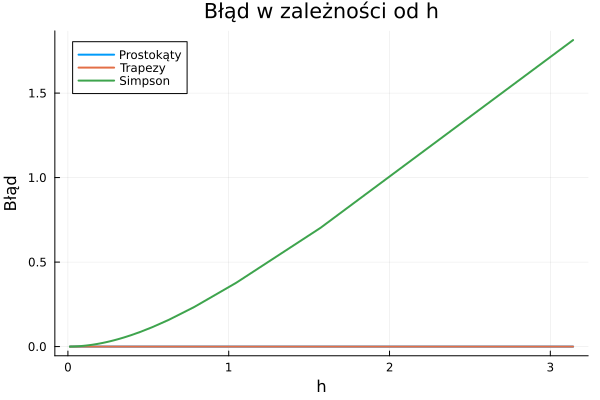

In [148]:
f_val(x) = sin(x)

a = 0
b = 2*pi
expected_value = 0

N = 3:2:500
errors_rect = []
errors_trap = []
errors_simp = []
hs = []

for n in N
    h = (b - a) / (n-1)
    push!(hs, h)

    rect = rectangle(f_val, a, b, n)
    trap = trapeze(f_val, a, b, n)
    simp = simpson_composite(f_val, a, b, n)

    push!(errors_rect, abs(rect - expected_value))
    push!(errors_trap, abs(trap - expected_value))
    push!(errors_simp, abs(simp - expected_value))
end

plot(hs, errors_rect,  label="Prostokąty", lw=2, title="Błąd w zależności od h", xlabel="h", ylabel="Błąd")
plot!(hs, errors_trap, label="Trapezy", lw=2)
plot!(hs, errors_simp, label="Simpson", lw=2)

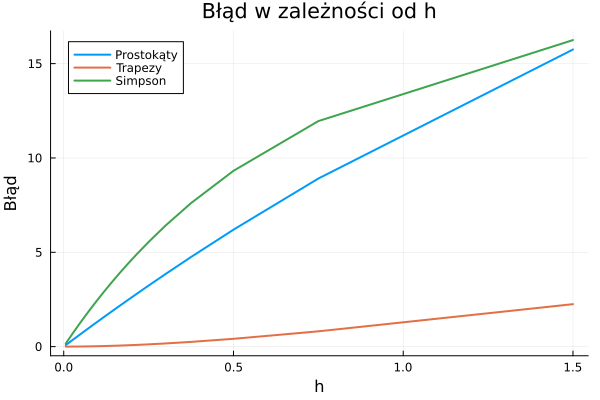

In [149]:
f_val(x) = x^3

a = 0
b = 3
expected_value = 20.25

N = 3:2:500
errors_rect = []
errors_trap = []
errors_simp = []
hs = []

for n in N
    h = (b - a) / (n-1)
    push!(hs, h)

    rect = rectangle(f_val, a, b, n)
    trap = trapeze(f_val, a, b, n)
    simp = simpson_composite(f_val, a, b, n)

    push!(errors_rect, abs(rect - expected_value))
    push!(errors_trap, abs(trap - expected_value))
    push!(errors_simp, abs(simp - expected_value))
end

plot(hs, errors_rect,  label="Prostokąty", lw=2, title="Błąd w zależności od h", xlabel="h", ylabel="Błąd")
plot!(hs, errors_trap, label="Trapezy", lw=2)
plot!(hs, errors_simp, label="Simpson", lw=2)